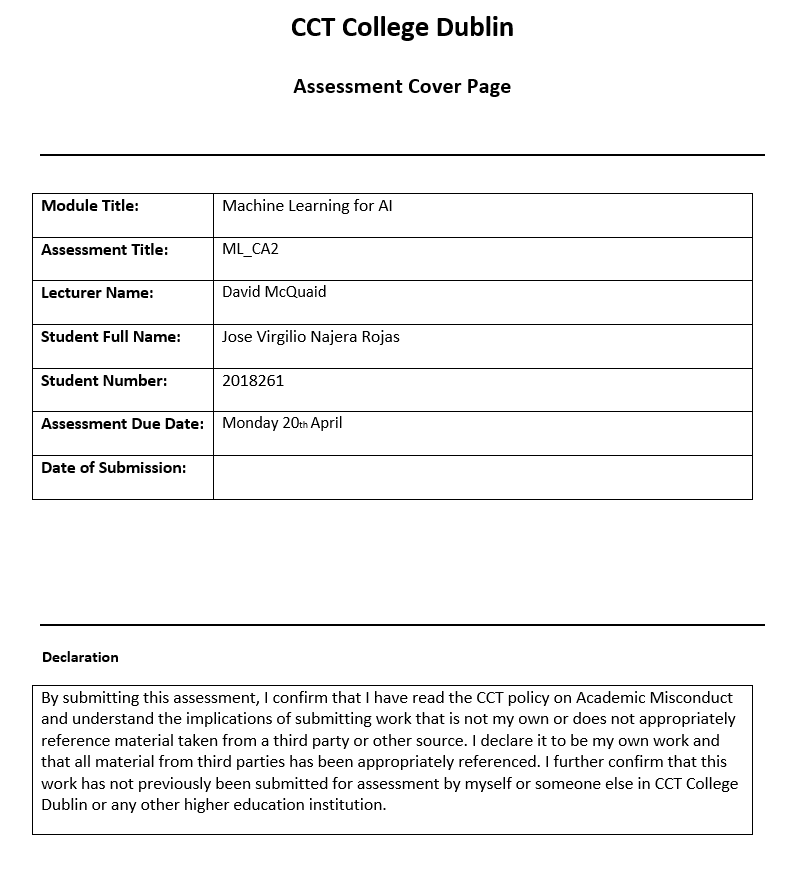

First imports to used

In [238]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)
import seaborn as sn

## Part No.1

### Preparing Dataset

Define a function to read, resize and store the data

In [232]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

**The dataset that will be used is the .zip file provided by ML lecture in moodle.**

In [193]:
data_path = 'Image'
dir_list = os.listdir(data_path)
  
print("Files and directories in "+data_path+" working directory :") 

dir_list


Files and directories in Image working directory :


['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DogHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'Natural',
 'PandaHead',
 'PigeonHead',
 'PigHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

Create the dataset, call the function and store the data in a pkl file, so you can load it next time without running jupyter again.

In [194]:
base_name = 'animal_faces'
width = 80
 
include = {'BearHead',
 'CatHead',
 'CowHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'Natural',
 'PigeonHead',
 'SheepHead',
 'TigerHead',
 'WolfHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

BearHead
CatHead
CowHead
DuckHead
EagleHead
ElephantHead
HumanHead
LionHead
MonkeyHead
MouseHead
Natural
PigeonHead
SheepHead
TigerHead
WolfHead


load the data from disk and print the details.

In [195]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

 
Counter(data['label'])

number of samples:  1475
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Cat' 'Cow' 'Duck' 'Eagle' 'Elephant' 'Human' 'Lion' 'Monkey'
 'Mouse' 'Nat' 'Pigeon' 'Sheep' 'Tiger' 'Wolf']


Counter({'Bear': 101,
         'Cat': 159,
         'Cow': 101,
         'Duck': 102,
         'Eagle': 97,
         'Elephant': 100,
         'Human': 100,
         'Lion': 97,
         'Monkey': 100,
         'Mouse': 100,
         'Nat': 8,
         'Pigeon': 98,
         'Sheep': 100,
         'Tiger': 112,
         'Wolf': 100})

show an example of each animal

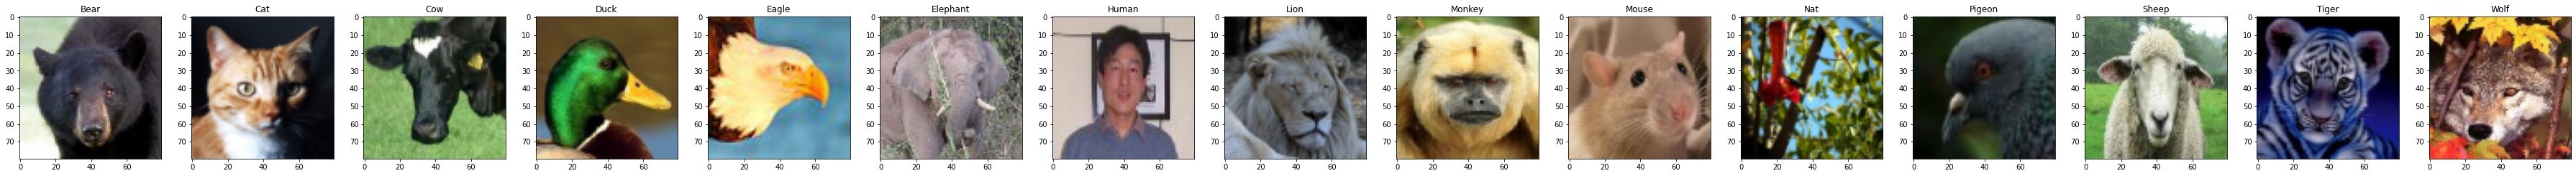

In [196]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(50, 20)
fig.tight_layout()
 
# make a plot for every label. The index method returns the 
# index of the first item corresponding to its search string.
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.set_title(label)

In [197]:
X = np.array(data['data'])
y = np.array(data['label'])

In [198]:
print (X)

[[[[7.64705882e-01 8.43137255e-01 7.37254902e-01]
   [7.64705882e-01 8.43137255e-01 7.37254902e-01]
   [7.64705882e-01 8.43137255e-01 7.37254902e-01]
   ...
   [3.12178309e-01 2.88970588e-01 2.96813725e-01]
   [3.08532475e-01 2.85003064e-01 2.92846201e-01]
   [2.85768995e-01 2.62239583e-01 2.70082721e-01]]

  [[7.60784314e-01 8.39215686e-01 7.33333333e-01]
   [7.60784314e-01 8.39215686e-01 7.33333333e-01]
   [7.60784314e-01 8.39215686e-01 7.33333333e-01]
   ...
   [3.22058824e-01 2.98529412e-01 3.06372549e-01]
   [3.17401961e-01 2.93872549e-01 3.01715686e-01]
   [3.01179534e-01 2.77650123e-01 2.85493260e-01]]

  [[7.56127451e-01 8.34558824e-01 7.27941176e-01]
   [7.56127451e-01 8.34558824e-01 7.27941176e-01]
   [7.56127451e-01 8.34558824e-01 7.27941176e-01]
   ...
   [3.30147059e-01 3.06617647e-01 3.14460784e-01]
   [3.20327819e-01 2.96798407e-01 3.04641544e-01]
   [3.05070466e-01 2.81541054e-01 2.89384191e-01]]

  ...

  [[9.96078431e-01 9.96078431e-01 9.92156863e-01]
   [9.96078431e-

Split the data into a test set and a training set. We use the train_test_split function and use 80% 

In [199]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

Let's see how the data was separated by train and test in each of the animal classes.

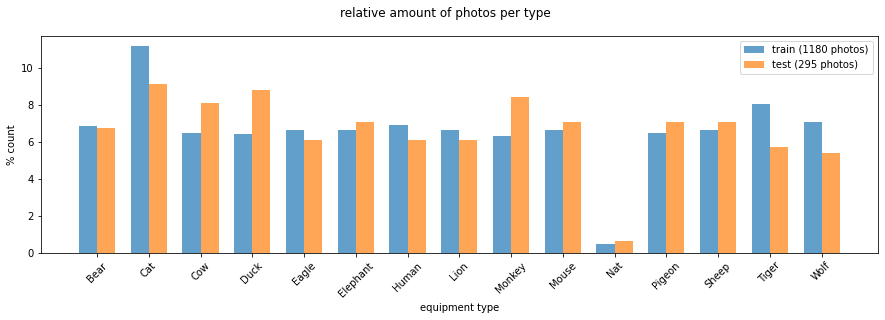

In [200]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    
plt.figure(figsize=(15,4))
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);



The distributions are not perfectly equal, but good enough.

### Processing Data

It's use these two object recognition HOG-SVM, Histogram of Oriented Gradients and Support Vector Machines

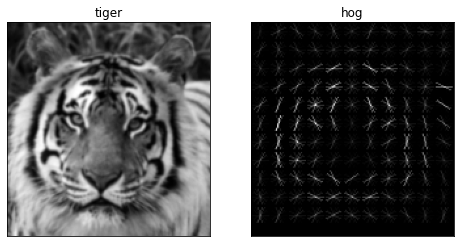

In [201]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
tiger = imread('Image\TigerHead\Bengal_Tiger.jpg', as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
tiger = rescale(tiger, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
tiger_hog, tiger_hog_img = hog(
    tiger, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(tiger, cmap='gray')
ax[0].set_title('tiger')
ax[1].imshow(tiger_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [202]:
print('number of pixels: ', tiger.shape[0] * tiger.shape[1])
print('number of hog features: ', tiger_hog.shape[0])

number of pixels:  25265
number of hog features:  3600


### Performed a transformation

Define the RGB2GrayTransformer and HOGTransformer

In [203]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

Preprocess our RGB images to scaled HOG features

In [204]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(1180, 576)


### Train a classifier

In [206]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

### Testing

In [207]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [208]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True False False  True  True False  True False  True  True  True  True
  True False  True  True  True False  True False  True False  True False
 False]

Percentage correct:  72.88135593220339


### Confusion matrix

use a correlation matrix. This is a table where each row corresponds to a label

In [209]:
import pandas as pd

In [210]:
labels = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',  'no', 'no', 'no']
predictions = ['yes', 'yes', 'yes', 'yes', 'no',  'no',  'yes', 'no', 'no', 'no']
 
# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

,true_label,prediction
0,yes,yes
1,yes,yes
2,yes,yes
3,yes,yes
4,yes,no
5,yes,no
6,no,yes
7,no,no
8,no,no
9,no,no


In [253]:
from sklearn.metrics import confusion_matrix
 
label_names = ['yes', 'no']
cmx = confusion_matrix(labels, predictions, labels=label_names)
df = pd.DataFrame(cmx, columns=label_names, index=label_names)
df.columns.name = 'prediction'
df.index.name = 'label'
df

prediction,yes,no
label,,
yes,4,2
no,1,3


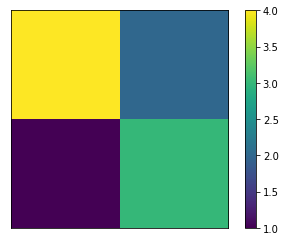

In [255]:
plt.imshow(cmx)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [213]:
cmx = confusion_matrix(y_test, y_pred)
cmx

array([[12,  1,  0,  0,  0,  3,  0,  1,  1,  0,  0,  0,  0,  0,  2],
       [ 0, 24,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  1, 16,  0,  0,  1,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  1,  0, 16,  5,  0,  0,  1,  0,  0,  0,  1,  2,  0,  0],
       [ 0,  0,  0,  2, 12,  0,  0,  0,  2,  0,  0,  1,  0,  1,  0],
       [ 1,  1,  0,  0,  0, 18,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 14,  0,  0,  1,  0,  1,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 13,  1,  1,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  1, 21,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  1,  2,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  4,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  2,  0,  1,  0,  1,  0,  0, 10,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, 14,  0],
       [ 1,  0,  0,  0,  0,  0,  0

combine what we see in the confusion matrix with what we already know about the data.


 ['Bear', 'Cat', 'Cow', 'Duck', 'Eagle', 'Elephant', 'Human', 'Lion', 'Monkey', 'Mouse', 'Nat', 'Pigeon', 'Sheep', 'Tiger', 'Wolf']


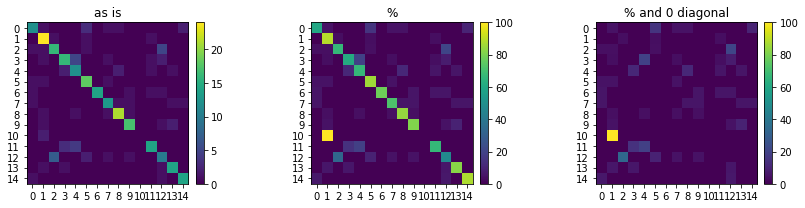

In [247]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

### Optimisation with pipeline

In [215]:
from sklearn.pipeline import Pipeline
from sklearn import svm
 
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', 100*np.sum(clf.predict(X_test) == y_test)/len(y_test))


Percentage correct:  72.88135593220339


### Grid search to optimise the transformations and the final results

In [216]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },
    {
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(3, 3)],
         'hogify__pixels_per_cell': [(8, 8)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

In [217]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  2.9min finished


In [218]:
# save the model to disk
joblib.dump(grid_res, 'hog_sgd_model.pkl');

In [219]:
from sklearn.svm import SVC

In [220]:
Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])

In [221]:
# the highscore during the search
grid_res.best_score_

0.804252076310045

In [222]:
pp.pprint(grid_res.best_params_)

{   'classify': SVC(kernel='linear'),
    'hogify__cells_per_block': (3, 3),
    'hogify__orientations': 8,
    'hogify__pixels_per_cell': (8, 8)}


### GridSearchCV results - the best results

In [223]:
best_pred = grid_res.predict(X_test)
print('Percentage correct: ', 100*np.sum(best_pred == y_test)/len(y_test))

Percentage correct:  84.40677966101696


In [224]:
cmx_svm = confusion_matrix(y_test, best_pred)

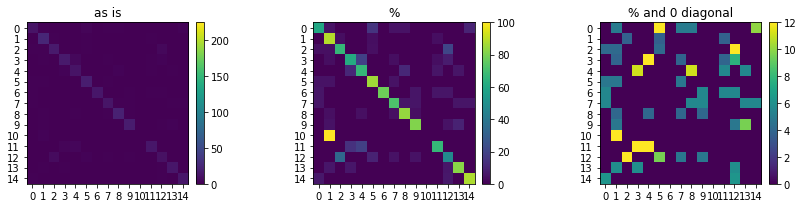

In [243]:
plot_confusion_matrix(cmx, vmax1=225, vmax2=100, vmax3=12)


<AxesSubplot:>

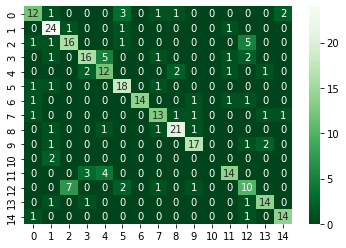

In [244]:
sn.heatmap(cmx, annot=True,cmap="Greens_r")

<AxesSubplot:>

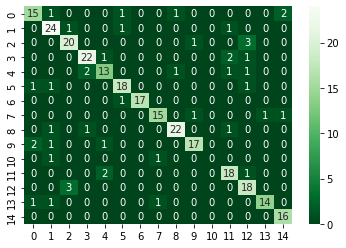

In [256]:
sn.heatmap(cmx_svm, annot=True,cmap="Greens_r")

### In conclusion... 

**It built a model for categorizing faces images using HOG-SVM and CV. It used gridsearch and a pipeline to evaluate the best model and parameters, increasing accuracy from 72 percent to 80 percent.**

# Part No. 2

## Sentiment Analysis on "Amazon Cell Phone Review"

**Import All Required Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Read data from csv**

In [3]:
items = pd.read_csv("20190928-items.csv")
reviews = pd.read_csv("20190928-reviews.csv")

In [4]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [5]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [6]:
print("The dataset Items contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(items.shape))

The dataset Items contains  792 rows and  9 variables.


In [7]:
print("The dataset Reviews contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(reviews.shape))

The dataset Reviews contains  82815 rows and  8 variables.


In [8]:
reviews.describe(include="all")

,asin,name,rating,date,verified,title,body,helpfulVotes
count,82815,82810,82815.000000,82815,82815,82805,82795,33134.000000
unique,792,55973,NaN,2948,2,49134,72630,NaN
top,B071ZN4K8V,Amazon Customer,NaN,"July 17, 2019",True,Five Stars,Good,NaN
freq,984,8812,NaN,241,75565,8279,343,NaN
mean,NaN,NaN,3.760357,NaN,NaN,NaN,NaN,7.204835
std,NaN,NaN,1.605644,NaN,NaN,NaN,NaN,28.057901
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,4.000000


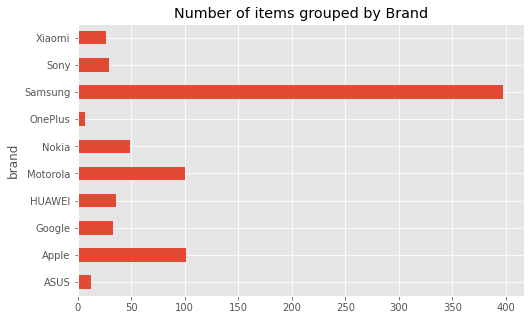

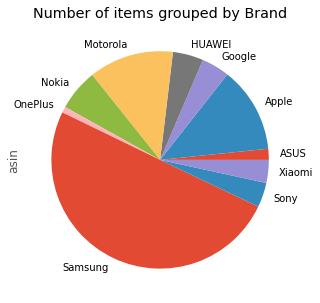

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# Brand distribution
ax = items.groupby("brand").count()["asin"].plot(kind="barh", 
                                                 figsize=(8, 5),
                                                 title="Number of items grouped by Brand")
plt.show()
ax = items.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Number of items grouped by Brand")
plt.show()

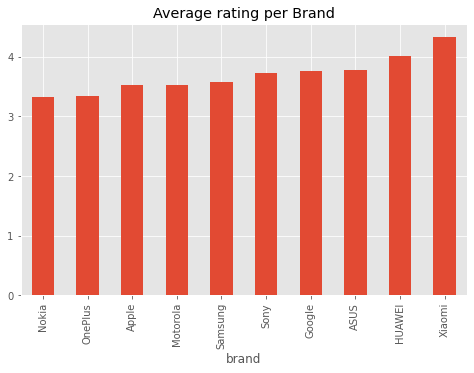

In [10]:
# Average rating per brand
ax = items.groupby("brand").mean()["rating"].sort_values().plot(kind="bar",
                                                                figsize=(8,5), 
                                                                title="Average rating per Brand")
plt.show()

In [11]:
# Reviews overview
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(reviews.shape))
reviews.head()

The dataset contains  82,815 rows and  8 variables.


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


**Drop unnecessary columns**

In [12]:
reviews = reviews.drop(['date','name', 'helpfulVotes',], axis=1)
reviews.dropna(inplace=True)

**Calculation of Polarity**

In [13]:
reviews['Polarity_Rating'] = reviews['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [14]:
reviews.head()

,asin,rating,verified,title,body,Polarity_Rating
0,B0000SX2UC,3,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,Neutral
1,B0000SX2UC,1,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Negative
2,B0000SX2UC,5,False,Love This Phone,"This is a great, reliable phone. I also purcha...",Positive
3,B0000SX2UC,3,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",Neutral
4,B0000SX2UC,4,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,Positive


**Plot the Rating visualization graph**

<AxesSubplot:xlabel='rating', ylabel='count'>

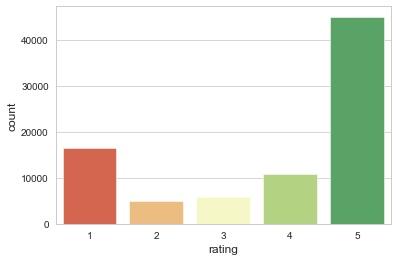

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='rating',data=reviews, palette='RdYlGn')

**Plot the Polarity Rating count**

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

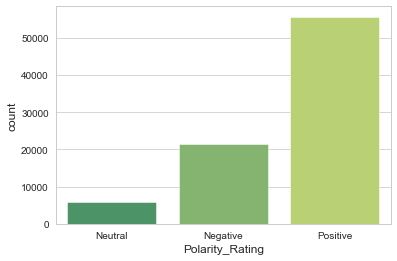

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=reviews, palette='summer')

**Data Preprocessing**

In [29]:
df_Positive = reviews[reviews['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = reviews[reviews['Polarity_Rating'] == 'Neutral']
df_Negative = reviews[reviews['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [30]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
reviews = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [31]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [32]:
reviews['review'] = reviews['body'].apply(get_text_processing)
reviews.head()

,asin,rating,verified,title,body,Polarity_Rating,review
2,B0000SX2UC,5,False,Love This Phone,"This is a great, reliable phone. I also purcha...",Positive,great reliable phone also purchased phone sams...
4,B0000SX2UC,4,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,Positive,phone great every purpose offers except day bo...
5,B0000SX2UC,4,False,Worked great for me,"Hello, I have this phone and used it until I d...",Positive,Hello phone used decided buy flip phone proble...
6,B0000SX2UC,5,False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,Positive,Cool Cheap Color 3 words describe Nokia 3588 p...
7,B0000SX2UC,4,False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",Positive,3599i overall nice phone except Nokia made uni...


**Visualize Text Review with Polarity Rating**

In [47]:
reviews[['body', 'Polarity_Rating', 'rating']].sample(10)

,body,Polarity_Rating,rating
1963,This phone is exactly what someone needs if th...,Positive,5
17758,Product was not as described. Returned it. It ...,Neutral,3
8684,I just received my Note 3 today and it is A-W-...,Positive,4
5016,Missing same parts 1. USB cable connect to PC ...,Negative,1
115,Good deal and so are Tracfone's rates. And cov...,Positive,5
16162,I went to my T-Mobile store and was informed t...,Negative,1
28350,I had to return the phone due to it locking up...,Negative,2
11260,Too big for one hand. I replaced it already. N...,Neutral,3
73331,My Galaxy Note9 came without the included AKG ...,Negative,1
2168,"It's a shame, the phone is locked and can not ...",Negative,1


In [48]:
df = reviews[['body', 'Polarity_Rating']]
df.sample(10)

,body,Polarity_Rating
40353,Received my phone and it didn’t work correctly...,Neutral
8774,If you are tired of an iPhone (which I'd imagi...,Positive
29287,"Could not use the phone after 6 mths, If refur...",Negative
749,Great product,Positive
38986,"This looks great cosmetically, but it's actual...",Neutral
73200,Be ware won't work with Wireless Republic.,Negative
19627,I ordered this phone for my husband 2 weeks ag...,Negative
45606,Terrible!!! The phone will not charge! I’m sen...,Negative
30008,Not unlocked. Only works with at&t network. Ha...,Neutral
10693,I bought used here on Amazon. It's a good phon...,Positive


In [49]:
df.shape

(24000, 2)

**Apply One hot encoding on negative, neutral, and positive**

In [50]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.sample(10)

C:\Users\Jose\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,body,Negative,Neutral,Positive
2161,"sent to my boyfriend and he loved it ,he only ...",0,0,1
18321,"Everything works great, except battery dies wi...",0,1,0
10204,COMING FROM AN IPHONE 4S THIS PHONE HAS FEW PR...,0,1,0
19249,Bought this phone in cold...it arrives without...,1,0,0
785,"Great product, good ship time.",0,0,1
19592,Functional but a lot of crashes,0,1,0
11670,"I'm sure this phone will be good, I had the ga...",0,1,0
11169,Worked perfectly!!,0,0,1
59150,I have had this phone for 3 1/2 months. The sc...,0,1,0
44443,El producto llegó con muchaa muchas abolladura...,0,1,0


**Apply Train Test Split**

In [51]:
X = df['body'].values
y = df.drop('body', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Apply vectorization**

In [52]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [53]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

**Add different layers**

In [57]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

**Fit the Model**

In [58]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
66/66 [==============================] - 786s 11s/step - loss: 0.6622 - accuracy: 0.7025 - val_loss: 0.5186 - val_accuracy: 0.7869
Epoch 2/100
66/66 [==============================] - 550s 8s/step - loss: 0.2702 - accuracy: 0.9035 - val_loss: 0.4757 - val_accuracy: 0.8249
Epoch 3/100
66/66 [==============================] - 377s 6s/step - loss: 0.0880 - accuracy: 0.9729 - val_loss: 0.5894 - val_accuracy: 0.8285
Epoch 4/100
66/66 [==============================] - 526s 8s/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.7507 - val_accuracy: 0.8157
Epoch 4: early stopping


**Evaluation of Model**

In [60]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

113/113 [==============================] - 44s 382ms/step - loss: 0.7507 - accuracy: 0.8157
Test accuracy: 0.8156944513320923


**Prediction**

In [61]:
preds = model.predict(X_test)
preds

225/225 [==============================] - 95s 417ms/step


array([[2.3198230e-04, 2.3397886e-04, 9.9953401e-01],
       [9.9934202e-01, 6.4882293e-04, 9.1560360e-06],
       [1.1853608e-01, 8.7126142e-01, 1.0202503e-02],
       ...,
       [9.9948633e-01, 5.1285181e-04, 7.8012101e-07],
       [8.6380631e-01, 2.2132207e-02, 1.1406142e-01],
       [1.7514640e-05, 2.4833868e-04, 9.9973410e-01]], dtype=float32)

In [62]:
preds.shape

(7200, 3)

### In conclusion... 

**Sentiment Analysis has been performed on a dataset from "Amazon Cell Phone Review" using this method to obtain information that will allow them to understand how customers react to the purchase of phones through Amazon platform.
The sentiment analyst employs advanced artificial intelligence technologies such as text processing and analysis to identify, extract, and classify a text as positive, negative, or neutral.**

**In this case, the accuracy is 82 percent, and as shown in the ranking, the classification analysis is related to consumer reviews.**

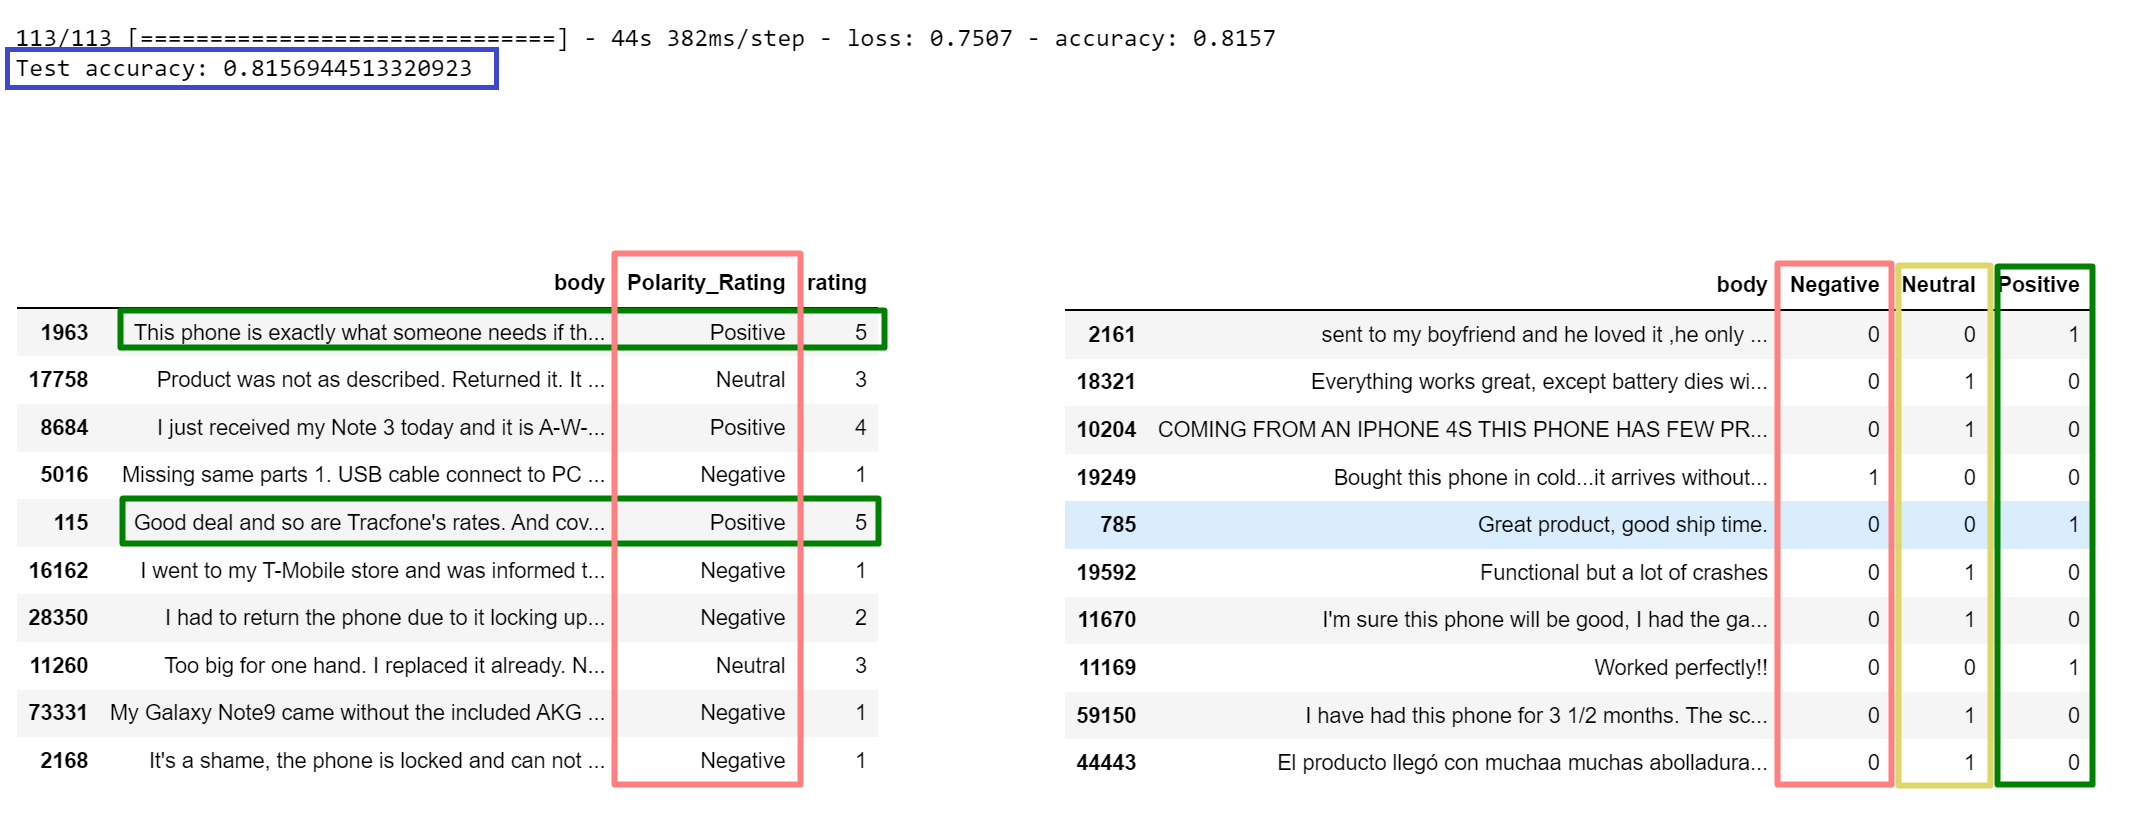